In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dftrain1=pd.read_csv('train.csv')
dftest1= pd.read_csv('test.csv')

#Know Your Data

In [4]:
dftrain1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [5]:
dftest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [6]:
dftrain=dftrain1.copy()

In [7]:
dftrain.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [8]:
dftest1.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


#Data Cleaning

In [9]:
dftrain.duplicated().any()

False

In [10]:
# Display column summary for dftrain
summary = dftrain.isnull().sum().reset_index()
summary.columns = ['Column Name', 'Null Values']
summary['Data Type'] = dftrain.dtypes.values
summary['Unique Values'] = dftrain.nunique().values
summary['Percentage of Null Values'] = (summary['Null Values'] / len(dftrain)) * 100

# Rearrange columns for better readability
summary = summary[['Column Name', 'Data Type', 'Unique Values', 'Null Values', 'Percentage of Null Values']]

In [11]:
summary

,Column Name,Data Type,Unique Values,Null Values,Percentage of Null Values
0,id,int64,140700,0,0.000000
1,Name,object,422,0,0.000000
2,Gender,object,2,0,0.000000
3,Age,float64,43,0,0.000000
4,City,object,98,0,0.000000
5,Working Professional or Student,object,2,0,0.000000
6,Profession,object,64,36630,26.034115
7,Academic Pressure,float64,5,112803,80.172708
8,Work Pressure,float64,5,27918,19.842217
9,CGPA,float64,331,112802,80.171997


In [12]:
# List of columns to drop
columns_to_drop = ['id', 'Name', 'Academic Pressure', 'CGPA', 'Study Satisfaction']

# Drop the specified columns
dftrain = dftrain.drop(columns=columns_to_drop, axis=1)

In [13]:
dftrain.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [14]:
# Display column summary for dftrain
summary1 = dftrain.isnull().sum().reset_index()
summary1.columns = ['Column Name', 'Null Values']
summary1['Data Type'] = dftrain.dtypes.values
summary1['Unique Values'] = dftrain.nunique().values
summary1['Percentage of Null Values'] = (summary1['Null Values'] / len(dftrain)) * 100

# Rearrange columns for better readability
summary1 = summary1[['Column Name', 'Data Type', 'Unique Values', 'Null Values', 'Percentage of Null Values']]

In [15]:
summary1

,Column Name,Data Type,Unique Values,Null Values,Percentage of Null Values
0,Gender,object,2,0,0.000000
1,Age,float64,43,0,0.000000
2,City,object,98,0,0.000000
3,Working Professional or Student,object,2,0,0.000000
4,Profession,object,64,36630,26.034115
5,Work Pressure,float64,5,27918,19.842217
6,Job Satisfaction,float64,5,27910,19.836532
7,Sleep Duration,object,36,0,0.000000
8,Dietary Habits,object,23,4,0.002843
9,Degree,object,115,2,0.001421


In [16]:
# Non-numeric columns
obj_cols = dftrain.select_dtypes(include='object').columns
obj_cols

Index(['Gender', 'City', 'Working Professional or Student', 'Profession',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')

In [17]:
for _ in obj_cols:
    print()
    print(f'Total Unique Values in {_} column are :- {dftrain[_].nunique()}')
    print(f'Value counts in {_} column are :-\n {dftrain[_].value_counts()}')
    print()
    print('-'*120)


Total Unique Values in Gender column are :- 2
Value counts in Gender column are :-
 Gender
Male      77464
Female    63236
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in City column are :- 98
Value counts in City column are :-
 City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in Working Professional or Student column are :- 2
Value counts in Working Professional or Student column are :-
 Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

-----

In [18]:
# Numeric columns
num_cols = dftrain.select_dtypes(include='number').columns
num_cols

Index(['Age', 'Work Pressure', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')

In [19]:
for _ in num_cols:
    print()
    print(f'Total Unique Values in {_} column are :- {dftrain[_].nunique()}')
    print(f'Value counts in {_} column are :-\n {dftrain[_].value_counts(normalize=True)}')
    print()
    print('-'*120)


Total Unique Values in Age column are :- 43
Value counts in Age column are :-
 Age
56.0    0.037285
49.0    0.036240
38.0    0.032438
53.0    0.032168
57.0    0.031237
47.0    0.029844
46.0    0.028998
54.0    0.027918
51.0    0.027910
18.0    0.027868
43.0    0.027406
59.0    0.026873
48.0    0.026262
45.0    0.025124
20.0    0.024982
50.0    0.024442
42.0    0.024115
24.0    0.023845
28.0    0.023724
39.0    0.023184
44.0    0.022864
41.0    0.022317
33.0    0.022317
29.0    0.022011
40.0    0.021990
58.0    0.020839
25.0    0.020832
23.0    0.020611
55.0    0.020227
35.0    0.020142
21.0    0.019488
37.0    0.019360
36.0    0.019211
19.0    0.018721
27.0    0.018571
52.0    0.018401
34.0    0.018323
31.0    0.018195
60.0    0.017775
26.0    0.014982
22.0    0.014684
30.0    0.013589
32.0    0.012687
Name: proportion, dtype: float64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in Work P

In [20]:
from sklearn.impute import KNNImputer

In [21]:
columns_to_impute = ['Work Pressure', 'Job Satisfaction']

In [22]:
# Calculate medians from the training dataset
median_values = {column: dftrain[column].median() for column in columns_to_impute}

# Impute null values in both train and test datasets
for column, median in median_values.items():
    # Impute null values in train dataset
    dftrain[column].fillna(median, inplace=True)

    # Impute null values in test dataset
    dftest1[column].fillna(median, inplace=True)

In [23]:
# Fill missing values in the 'Profession' column with 'Unknown'
dftrain['Profession'] = dftrain['Profession'].fillna('Unknown')

In [24]:
# Fill null values in 'Dietary Habits' with its mode
dietary_habits_mode = dftrain['Dietary Habits'].mode()[0]
dftrain['Dietary Habits'] = dftrain['Dietary Habits'].fillna(dietary_habits_mode)

# Fill null values in 'Degree' with its mode
degree_mode = dftrain['Degree'].mode()[0]
dftrain['Degree'] = dftrain['Degree'].fillna(degree_mode)

In [25]:
# Fill null values in 'Financial Stress' with its median
financial_stress_median = dftrain['Financial Stress'].median()
dftrain['Financial Stress'] = dftrain['Financial Stress'].fillna(financial_stress_median)

In [26]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  object 
 1   Age                                    140700 non-null  float64
 2   City                                   140700 non-null  object 
 3   Working Professional or Student        140700 non-null  object 
 4   Profession                             140700 non-null  object 
 5   Work Pressure                          140700 non-null  float64
 6   Job Satisfaction                       140700 non-null  float64
 7   Sleep Duration                         140700 non-null  object 
 8   Dietary Habits                         140700 non-null  object 
 9   Degree                                 140700 non-null  object 
 10  Have you ever had suicidal thoughts ?  140700 non-null  

**Handling Potentially erroneous categories in Each Column**

In [27]:
# Get the value counts for 'City' column
city_counts = dftrain['City'].value_counts()

In [28]:
# Set threshold for rare city occurrences (e.g., cities appearing less than 5 times)
threshold = 3000

# Identify cities with low frequency
rare_cities = city_counts[city_counts < threshold].index

# Replace these rare cities with 'Unknown' or 'Other'
dftrain['City'] = dftrain['City'].replace(rare_cities, 'Other Cities')

# Verify the change by checking the value counts again
print(dftrain['City'].value_counts())

City
Kalyan           6591
Patna            5924
Vasai-Virar      5765
Kolkata          5689
Ahmedabad        5613
Meerut           5528
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Srinagar         5074
Mumbai           4966
Indore           4872
Agra             4684
Surat            4636
Varanasi         4606
Vadodara         4568
Hyderabad        4496
Kanpur           4398
Jaipur           4328
Thane            4289
Lucknow          4280
Nagpur           4209
Bangalore        4123
Chennai          4044
Ghaziabad        3620
Delhi            3593
Bhopal           3475
Faridabad        3268
Nashik           3144
Other Cities       98
Name: count, dtype: int64


In [29]:
prof_counts = dftrain['Profession'].value_counts()

In [30]:
threshold = 300
rare_professions = prof_counts[prof_counts < threshold].index
dftrain['Profession'] = dftrain['Profession'].replace(rare_professions, 'Other Professions')

# Verify the change by checking the value counts again
print(dftrain['Profession'].value_counts())

Profession
Unknown                   36630
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Digital Marketer           1372
Accountant                 13

In [31]:
sleep_counts = dftrain['Sleep Duration'].value_counts()

In [32]:
threshold = 32000
rare_sleepcounts = sleep_counts[sleep_counts < threshold].index
dftrain['Sleep Duration'] = dftrain['Sleep Duration'].replace(rare_sleepcounts, 'Other')

# Verify the change by checking the value counts again
print(dftrain['Sleep Duration'].value_counts())

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
Other                   79
Name: count, dtype: int64


In [33]:
dietary_counts = dftrain['Dietary Habits'].value_counts()

In [34]:
threshold = 44000
rare_dietcounts = dietary_counts[dietary_counts < threshold].index
dftrain['Dietary Habits'] = dftrain['Dietary Habits'].replace(rare_dietcounts, 'Other Diets')

# Verify the change by checking the value counts again
print(dftrain['Dietary Habits'].value_counts())

Dietary Habits
Moderate       49709
Unhealthy      46227
Healthy        44741
Other Diets       23
Name: count, dtype: int64


In [35]:
degree_counts = dftrain['Degree'].value_counts()

In [36]:
threshold = 2000
rare_degreecounts = degree_counts[degree_counts < threshold].index
dftrain['Degree'] = dftrain['Degree'].replace(rare_degreecounts, 'Other Degrees')

# Verify the change by checking the value counts again
print(dftrain['Degree'].value_counts())

Degree
Class 12         14731
B.Ed             11691
B.Arch            8742
B.Com             8113
B.Pharm           5856
BCA               5739
M.Ed              5668
MCA               5234
BBA               5030
BSc               5027
MSc               4879
LLM               4647
M.Pharm           4537
M.Tech            4475
B.Tech            4425
LLB               4348
BHM               4305
MBA               3818
BA                3750
ME                3632
MD                3383
MHM               3286
BE                3104
PhD               3103
M.Com             3094
MBBS              3082
MA                2887
Other Degrees      114
Name: count, dtype: int64


#Data Preprocessing

**Converting Datatype and Encoding**

In [37]:
# Convert all object-type columns to category type
object_columns = dftrain.select_dtypes(include='object').columns
dftrain[object_columns] = dftrain[object_columns].astype('category')

In [38]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   Gender                                 140700 non-null  category
 1   Age                                    140700 non-null  float64 
 2   City                                   140700 non-null  category
 3   Working Professional or Student        140700 non-null  category
 4   Profession                             140700 non-null  category
 5   Work Pressure                          140700 non-null  float64 
 6   Job Satisfaction                       140700 non-null  float64 
 7   Sleep Duration                         140700 non-null  category
 8   Dietary Habits                         140700 non-null  category
 9   Degree                                 140700 non-null  category
 10  Have you ever had suicidal thoughts ?  14070

In [39]:
# Reverse Job Satisfaction scale
dftrain['Job Satisfaction'] = 6 - dftrain['Job Satisfaction']

If higher satisfaction (5) corresponds to less likelihood of depression, the data should reflect that. Inverting the scale ensures the relationship aligns with intuitive logic, making the model more interpretable.

In [40]:
# Define the mapping with "Other Diets" grouped as Moderate
diet_mapping = {
    'Healthy': 0,
    'Moderate': 1,
    'Unhealthy': 2,
    'Other Diets': 1
}

# Apply the mapping
dftrain['Dietary Habits'] = dftrain['Dietary Habits'].map(diet_mapping)

In [41]:
# Define the mapping for Yes/No to 1/0
binary_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to both columns
dftrain['Have you ever had suicidal thoughts ?'] = dftrain['Have you ever had suicidal thoughts ?'].map(binary_mapping)
dftrain['Family History of Mental Illness'] = dftrain['Family History of Mental Illness'].map(binary_mapping)

In [42]:
# Select category columns to encode, excluding the specified ones
columns_to_encode = dftrain.select_dtypes(include='category').columns.difference(
    ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Dietary Habits']
)

# Perform one-hot encoding
dftrain = pd.get_dummies(dftrain, columns=columns_to_encode, drop_first=True)

**Scaling**

In [43]:
# Separate predictor and target variables
x = dftrain.drop(columns=['Depression'])
y = dftrain[['Depression']]

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()
dftrain_scaled = scaler.fit_transform(x)

In [46]:
X_train_scaled = pd.DataFrame(dftrain_scaled, columns=x.columns)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y, test_size=0.2, random_state=42)

In [48]:
import matplotlib.pyplot as plt

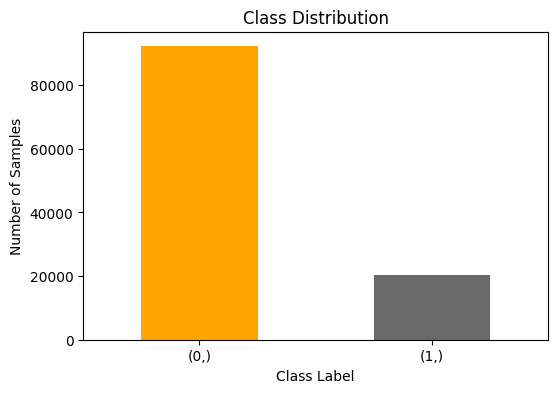

Class Ratio (Majority / Minority): 4.51


In [49]:
# Count class frequencies
class_counts = y_train.value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['orange', 'dimgrey'])
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# Print class ratio (optional)
print(f"Class Ratio (Majority / Minority): {class_counts.iloc[0] / class_counts.iloc[1]:.2f}")

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

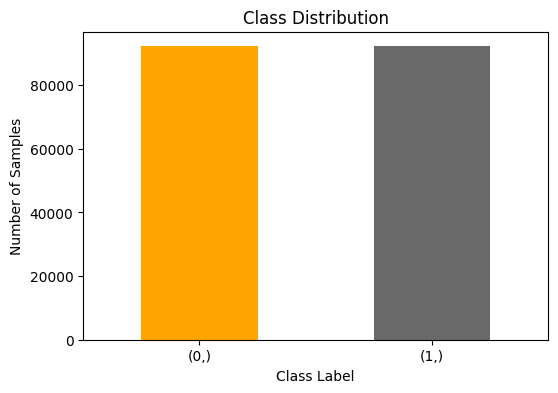

Class Ratio (Majority / Minority): 1.00


In [52]:
# Count class frequencies
class_counts = y_train_res.value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['orange', 'dimgrey'])
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# Print class ratio (optional)
print(f"Class Ratio (Majority / Minority): {class_counts.iloc[0] / class_counts.iloc[1]:.2f}")

In [53]:
X_train_res.shape

(184294, 107)

#Modeling- XGBoost / CatBoost

In [54]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [55]:
from xgboost import XGBClassifier

In [56]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=200,         # Number of trees
    learning_rate=0.1,        # Step size shrinkage
    max_depth=6,              # Maximum depth of a tree
    subsample=0.8,            # Subsampling ratio
    colsample_bytree=0.8,     # Subsampling ratio of columns
    random_state=42           # Reproducibility
)

# Train the model
xgb_model.fit(X_train_res, y_train_res)

# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate accuracy
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")


XGBoost Accuracy: 0.9304


In [57]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [58]:
from catboost import CatBoostClassifier

In [59]:
# Initialize the CatBoost model
cat_model = CatBoostClassifier(
    iterations=200,          # Number of iterations
    learning_rate=0.1,       # Step size
    depth=6,                 # Depth of the trees
    random_seed=42,          # Reproducibility
    verbose=0                # Suppress output during training
)

# Train the model
cat_model.fit(X_train_res, y_train_res)

# Make predictions on the validation set
y_pred_cat = cat_model.predict(X_val)

# Evaluate accuracy
accuracy_cat = accuracy_score(y_val, y_pred_cat)
print(f"CatBoost Accuracy: {accuracy_cat:.4f}")


CatBoost Accuracy: 0.9304


#Submission to Test Data

In [60]:
dftest=dftest1.copy()

In [61]:
# Fill missing values in the 'Profession' column with 'Unknown'
dftest['Profession'] = dftest['Profession'].fillna('Unknown')

In [62]:
# Fill null values in 'Dietary Habits' with Train data column mode
dftest['Dietary Habits'] = dftest['Dietary Habits'].fillna(dietary_habits_mode)

# Fill null values in 'Degree' with Train data column mode
dftest['Degree'] = dftest['Degree'].fillna(degree_mode)

In [63]:
# Fill null values in 'Financial Stress' with Train data column median
dftest['Financial Stress'] = dftest['Financial Stress'].fillna(financial_stress_median)

In [64]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             93800 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          93800 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

Handling potentially erroneous categories in each column

In [65]:
dftest['City'] = dftest['City'].apply(lambda x: 'Other Cities' if x in rare_cities else x)

In [66]:
dftest['Profession'] = dftest['Profession'].apply(lambda x: 'Other Professions' if x in rare_professions else x)

In [67]:
dftest['Sleep Duration'] = dftest['Sleep Duration'].apply(lambda x: 'Other' if x in rare_sleepcounts else x)

In [68]:
dftest['Dietary Habits'] = dftest['Dietary Habits'].apply(lambda x: 'Other Diets' if x in rare_dietcounts else x)

In [69]:
dftest['Degree'] = dftest['Degree'].apply(lambda x: 'Other Degrees' if x in rare_degreecounts else x)

In [70]:
dftest[object_columns] = dftest[object_columns].astype('category')

Applying Encoding

In [71]:
# Reverse Job Satisfaction scale
dftest['Job Satisfaction'] = 6 - dftest['Job Satisfaction']

In [72]:
dftest['Dietary Habits'] = dftest['Dietary Habits'].map(diet_mapping)

In [73]:
# Apply the mapping to both columns
dftest['Have you ever had suicidal thoughts ?'] = dftest['Have you ever had suicidal thoughts ?'].map(binary_mapping)
dftest['Family History of Mental Illness'] = dftest['Family History of Mental Illness'].map(binary_mapping)

In [74]:
# Perform one-hot encoding
dftest = pd.get_dummies(dftest, columns=columns_to_encode, drop_first=True)

Apply Scaling

In [75]:
# Align columns of test data to match train data
dftest_encoded = dftest.reindex(columns=x.columns, fill_value=0)

In [76]:
dftest_scaled = scaler.transform(dftest_encoded)

In [77]:
dftest_scaled = pd.DataFrame(dftest_scaled, columns=dftest_encoded.columns)

Fitting the best performing model: XGBoost

In [78]:
y_testpred_xgb = xgb_model.predict(dftest_scaled)

In [79]:
output = pd.DataFrame({'id': dftest1.id, 'Depression': y_testpred_xgb})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [81]:
'''from google.colab import files

# Download the file
files.download('submission.csv')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>